# Data Analysis in Python: Notes
## Author: Rohith K.M.S.

Some cool and useful things I learnt analysing the Kaggle Titanic Dataset


## Run matplotlib inline

In [1]:
%matplotlib inline

## Import required libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Import data

In [3]:
df = pd.read_csv("train.csv")

## Take a look at the data

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Notice that the data already has an index? Let's avoid redundancy by using the column PassengerId as the index column instead.

In [5]:
df = pd.read_csv("train.csv", index_col = 0)

In [6]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


There. Much better isn't it?

Let's look at what the columns represent:

PassengerId is an index
Survived is a boolean. 1 if survived. 0 if not.
Pclass is the ticket class of the person. There are three classes - 1,2,3

... etc

## 8/12/17 The joy of box plots.

Box plots offer a quick overview of data. (I think)


Text(0.5,1,'Some box plot')

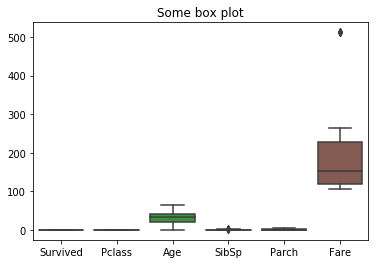

In [17]:
sns.boxplot(data = df[df.Fare>100]).set_title("Some box plot")


Let's take a closer look at the fare.

Plotting the Fare distribution.

(0, 553.32149885796059)

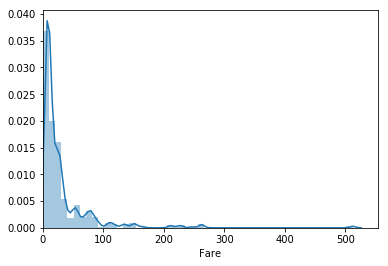

In [8]:
sns.distplot(df.Fare)
plt.xlim(0,None)

Let's plot the fare distributions for different sexes.

(0, 50)

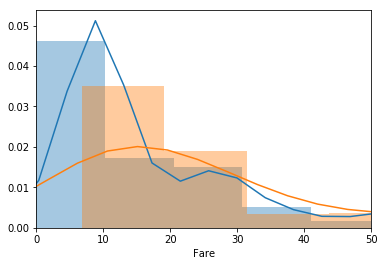

In [9]:
sns.distplot(df[df.Sex == 'male'].Fare)
sns.distplot(df[df.Sex == 'female'].Fare)
plt.xlim(0,50)

We see that there's a difference in the means of the distribution functions of the prices between two sexes. We could see if these differences are significant.

Possibly get a confidence estimate.

# 13/12/17 - Some more data analysis with Julian

Goal: fare difference b/w men and women

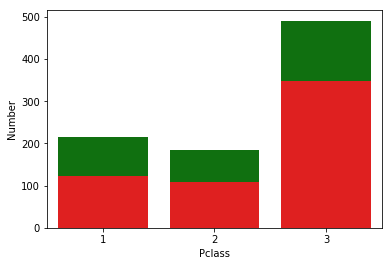

In [10]:
males = df[df.Sex == "male"].groupby('Pclass').count()
total = df.groupby('Pclass').count()

males = pd.DataFrame({'Number': males.Survived})
total = pd.DataFrame({'Number': total.Survived})

sns.barplot(x = total.index, y = total.Number, color='g')
sns.barplot(x = males.index, y = males.Number, color='r')


Another, easier way to do this.

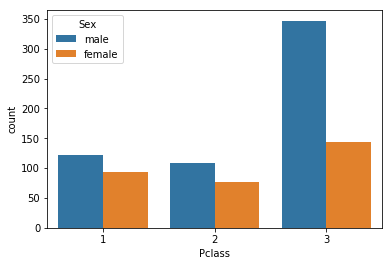

In [13]:
sns.countplot(x = "Pclass", hue = "Sex", data = df)

See which visualisation conveys the information better.

# Resources:

## Tutorials:

https://elitedatascience.com/python-seaborn-tutorial

https://www.kaggle.com/startupsci/titanic-data-science-solutions

https://www.kaggle.com/helgejo/an-interactive-data-science-tutorial


# Dataset:

https://www.kaggle.com/c/titanic#description